# Práctica 1. Web Scraping - Gráficas
**Nombres:** Juan Pablo Upoff, Ponce Proaño Miguel Alejandro

**Asignatura:** M2.851 - Tipología y ciclo de vida de los datos aula 1

**Actividad:** M2.851-20202-1134081-práctica1

## Librerías utilizadas

In [20]:
import pandas as pd
import os
from os import path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import random

In [3]:
pd.set_option('float_format', '{:f}'.format)

## Leer los datos de la hipotecas y empresas

In [4]:
df_empresas_hipotecas = pd.read_csv('../csv/empresas_hipotecas_españa.csv')
print(df_empresas_hipotecas.info())
df_empresas_hipotecas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       12500 non-null  float64
 1   Codigo         12500 non-null  float64
 2   Texto          12500 non-null  object 
 3   Total          12500 non-null  float64
 4   Anio           12500 non-null  int64  
 5   TipoEmpresa    12500 non-null  object 
 6   cod            10500 non-null  float64
 7   Shape__Area    10500 non-null  float64
 8   Shape__Length  10500 non-null  float64
 9   TipoHipoteca   10500 non-null  object 
 10  M01            10500 non-null  float64
 11  M02            10500 non-null  float64
 12  M03            10500 non-null  float64
 13  M04            10500 non-null  float64
 14  M05            10500 non-null  float64
 15  M06            10500 non-null  float64
 16  M07            10500 non-null  float64
 17  M08            10500 non-null  float64
 18  M09   

,OBJECTID,Codigo,Texto,Total,Anio,TipoEmpresa,cod,Shape__Area,Shape__Length,TipoHipoteca,...,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
0,1.000000,1.000000,Araba/Álava,18518.000000,2017,Total,1.000000,5558819816.938478,899065.384761,Importe_hipotecas,...,53254.000000,31073.000000,63502.000000,29401.000000,32969.000000,22977.000000,44810.000000,39951.000000,37119.000000,31979.000000
1,1.000000,1.000000,Araba/Álava,18518.000000,2017,Total,1.000000,5558819816.938478,899065.384761,Numero_hipotecas,...,597.000000,263.000000,299.000000,244.000000,273.000000,183.000000,407.000000,334.000000,389.000000,377.000000
2,2.000000,2.000000,Albacete,26921.000000,2017,Total,2.000000,24628869196.668800,982714.983177,Importe_hipotecas,...,28018.000000,19598.000000,52585.000000,23393.000000,44807.000000,35571.000000,44849.000000,16399.000000,38425.000000,23339.000000
3,2.000000,2.000000,Albacete,26921.000000,2017,Total,2.000000,24628869196.668800,982714.983177,Numero_hipotecas,...,345.000000,202.000000,387.000000,288.000000,608.000000,462.000000,541.000000,238.000000,208.000000,240.000000
4,3.000000,3.000000,Alicante,135480.000000,2017,Total,3.000000,9507175453.609671,698396.737290,Importe_hipotecas,...,210355.000000,222585.000000,153248.000000,157547.000000,121150.000000,128666.000000,206276.000000,125571.000000,150514.000000,115540.000000


### Conversión a tabla pivote

In [6]:
columnas_base = ["OBJECTID","Codigo","Texto","cod","Shape__Area","Shape__Length","TipoHipoteca","Anio","TipoEmpresa","Total"]
df_total_mes = df_empresas_hipotecas.melt(id_vars=columnas_base,var_name="Mes",value_name="TotalMes")
df_total_mes.head(10)

,OBJECTID,Codigo,Texto,cod,Shape__Area,Shape__Length,TipoHipoteca,Anio,TipoEmpresa,Total,Mes,TotalMes
0,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938478,899065.384761,Importe_hipotecas,2017,Total,18518.000000,M01,48296.000000
1,1.000000,1.000000,Araba/Álava,1.000000,5558819816.938478,899065.384761,Numero_hipotecas,2017,Total,18518.000000,M01,343.000000
2,2.000000,2.000000,Albacete,2.000000,24628869196.668800,982714.983177,Importe_hipotecas,2017,Total,26921.000000,M01,18417.000000
3,2.000000,2.000000,Albacete,2.000000,24628869196.668800,982714.983177,Numero_hipotecas,2017,Total,26921.000000,M01,210.000000
4,3.000000,3.000000,Alicante,3.000000,9507175453.609671,698396.737290,Importe_hipotecas,2017,Total,135480.000000,M01,165330.000000
5,3.000000,3.000000,Alicante,3.000000,9507175453.609671,698396.737290,Numero_hipotecas,2017,Total,135480.000000,M01,1620.000000
6,4.000000,4.000000,Almería,4.000000,13855293063.925501,764383.039721,Importe_hipotecas,2017,Total,42329.000000,M01,53648.000000
7,4.000000,4.000000,Almería,4.000000,13855293063.925501,764383.039721,Numero_hipotecas,2017,Total,42329.000000,M01,533.000000
8,5.000000,5.000000,Ávila,5.000000,13966290552.547899,825947.526118,Importe_hipotecas,2017,Total,10178.000000,M01,5644.000000
9,5.000000,5.000000,Ávila,5.000000,13966290552.547899,825947.526118,Numero_hipotecas,2017,Total,10178.000000,M01,87.000000


## Representaciones Gráficas

[Text(0, 0, 'Almería'),
 Text(1, 0, 'Girona'),
 Text(2, 0, 'Granada'),
 Text(3, 0, 'Rioja, La'),
 Text(4, 0, 'Lugo'),
 Text(5, 0, 'Tarragona')]

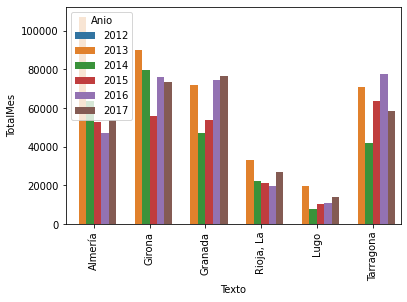

In [36]:
ciudades = random.choices(np.unique(df_total_mes['Texto']), k=7)
df_ciudades_mes = df_total_mes[(df_total_mes['TipoHipoteca']=='Importe_hipotecas')
                            &(df_total_mes['TipoEmpresa']!='Total')
                            &(df_total_mes['Mes']=='M01')
                           &(df_total_mes['Texto'].isin(ciudades))]
df_anio_2017.head(10)
ax=sns.barplot(x='Texto', y='TotalMes', hue='Anio', data=df_anio_2017)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### Gráfica Totales Mes Hipotecas y Tipo de Empresa

En la gráfica se puede observar que no los registros de importe de hipotecas se empiezan a registrar desde el año 2012, esta información es importante si deseamos realizar análisis de regresión o modelos de clasificación.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017')])

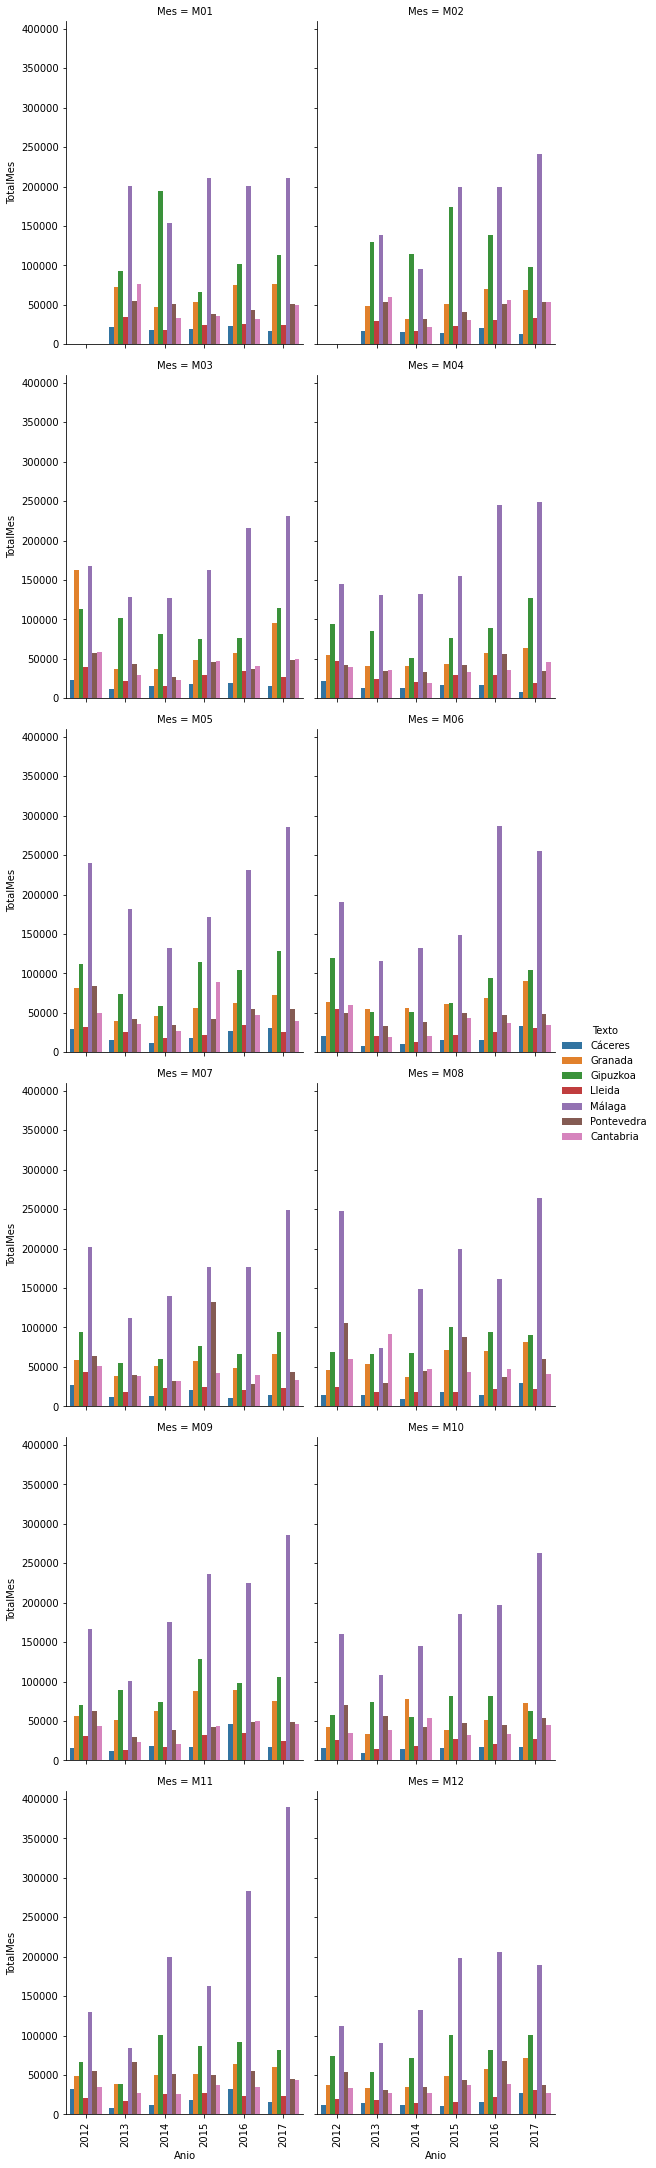

In [40]:
df_ciudades = df_total_mes[(df_total_mes['TipoHipoteca']=='Importe_hipotecas')
                            &(df_total_mes['TipoEmpresa']!='Total')                            
                           &(df_total_mes['Texto'].isin(ciudades))]

ax1=sns.catplot(x='Anio', y='TotalMes', hue='Texto',
               col="Mes",data=df_ciudades,kind="bar",col_wrap=2,
                height=5, aspect=.8)
ax1.set_xticklabels(rotation=90)
plt.xticks(rotation=90)